In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_dataset.csv', encoding = "latin-1")

df

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_83679/1381291812.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_dataset.csv', encoding = "latin-1")


,Unnamed: 0,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,88884,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,88885,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,88886,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,88887,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [3]:
drop_unnamed = ['Unnamed: 0']

df = df.drop(columns=drop_unnamed)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81793 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

eventdate_isna = df['Event.Date'].isna().value_counts()
eventdate_isna

Took the 'Event.Date' column and separating the Year and Month to look at the data year over year, which months have the most quantitative data.

In [5]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

print(df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
0     1948-10-24  1948     10
1     1962-07-19  1962      7
2     1974-08-30  1974      8
3     1977-06-19  1977      6
4     1979-08-02  1979      8
...          ...   ...    ...
88884 2022-12-26  2022     12
88885 2022-12-26  2022     12
88886 2022-12-26  2022     12
88887 2022-12-26  2022     12
88888 2022-12-29  2022     12

[88889 rows x 3 columns]


In [6]:
invest_type_vc = df['Investigation.Type'].value_counts()
print(invest_type_vc)

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64


99.6% of the data shows the events recorded were 'Accident' related. Consider not using the rows containing 'Incident'. Looking at how many of the other quantitative columns would be seriously impacted if we decided not to use 'Incident' related events.

In [7]:
df.select_dtypes(include=[np.number]).mean()

Number.of.Engines            1.146585
Total.Fatal.Injuries         0.647855
Total.Serious.Injuries       0.279881
Total.Minor.Injuries         0.357061
Total.Uninjured              5.325440
Year                      1999.206662
Month                        6.591221
dtype: float64

In [8]:
df.select_dtypes(include=[np.number]).std()

Number.of.Engines          0.446510
Total.Fatal.Injuries       5.485960
Total.Serious.Injuries     1.544084
Total.Minor.Injuries       2.235625
Total.Uninjured           27.913634
Year                      11.888226
Month                      3.062868
dtype: float64

In [66]:
df = pd.read_csv('final_dataset.csv', encoding = "latin-1")

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_83679/1686955178.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_dataset.csv', encoding = "latin-1")


In [67]:
incidents_df = df[df['Investigation.Type'] == 'Incident']

In [69]:
print(incidents_df['Number.of.Engines'].value_counts())

Number.of.Engines
2.0    1674
1.0     513
3.0     276
4.0     206
0.0      21
Name: count, dtype: int64


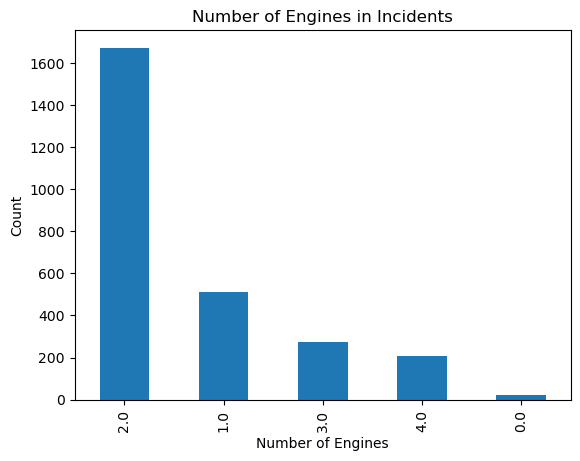

In [70]:
incidents_df['Number.of.Engines'].value_counts().plot(kind='bar', title='Number of Engines in Incidents')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.show()

In [71]:
print(incidents_df['Total.Fatal.Injuries'].describe())

count    3229.000000
mean        0.006813
std         0.096163
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Total.Fatal.Injuries, dtype: float64


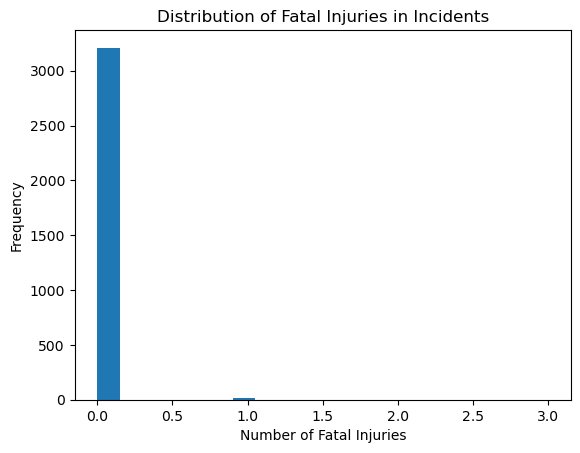

In [72]:
incidents_df['Total.Fatal.Injuries'].plot(kind='hist', bins=20, title='Distribution of Fatal Injuries in Incidents')
plt.xlabel('Number of Fatal Injuries')
plt.ylabel('Frequency')
plt.show()

count    3227.000000
mean        0.094825
std         1.800925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        88.000000
Name: Total.Serious.Injuries, dtype: float64


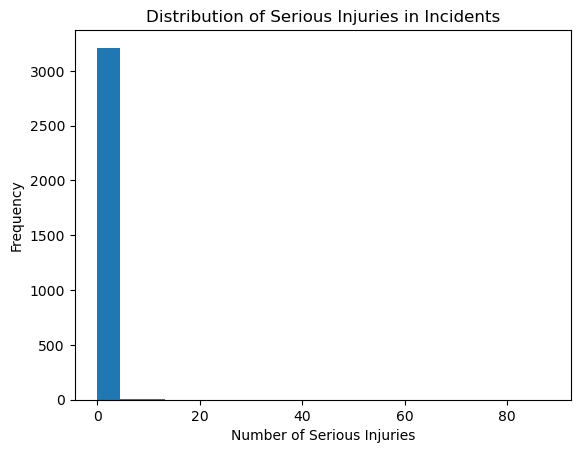

In [73]:
print(incidents_df['Total.Serious.Injuries'].describe())
incidents_df['Total.Serious.Injuries'].plot(kind='hist', bins=20, title='Distribution of Serious Injuries in Incidents')
plt.xlabel('Number of Serious Injuries')
plt.ylabel('Frequency')
plt.show()

count    3250.000000
mean        0.363692
std         6.920471
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       380.000000
Name: Total.Minor.Injuries, dtype: float64


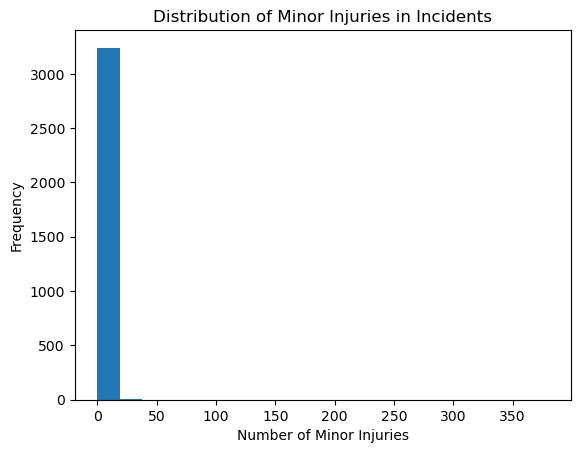

In [74]:
print(incidents_df['Total.Minor.Injuries'].describe())
incidents_df['Total.Minor.Injuries'].plot(kind='hist', bins=20, title='Distribution of Minor Injuries in Incidents')
plt.xlabel('Number of Minor Injuries')
plt.ylabel('Frequency')
plt.show()

count    3730.000000
mean       50.111260
std        83.380418
min         0.000000
25%         1.000000
50%         4.000000
75%        78.000000
max       588.000000
Name: Total.Uninjured, dtype: float64


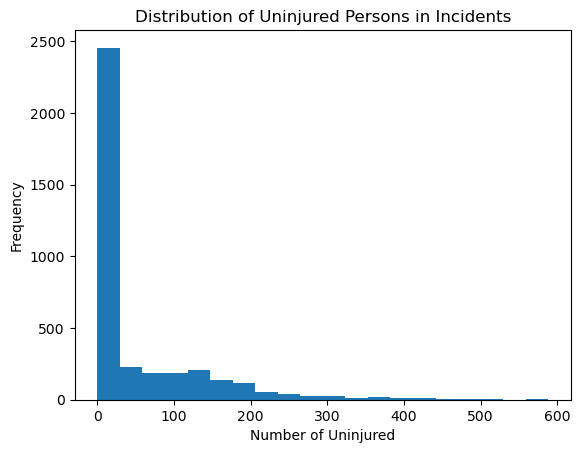

In [75]:
print(incidents_df['Total.Uninjured'].describe())
incidents_df['Total.Uninjured'].plot(kind='hist', bins=20, title='Distribution of Uninjured Persons in Incidents')
plt.xlabel('Number of Uninjured')
plt.ylabel('Frequency')
plt.show()

In [76]:
accidents_df = df[df['Investigation.Type'] == 'Accident']

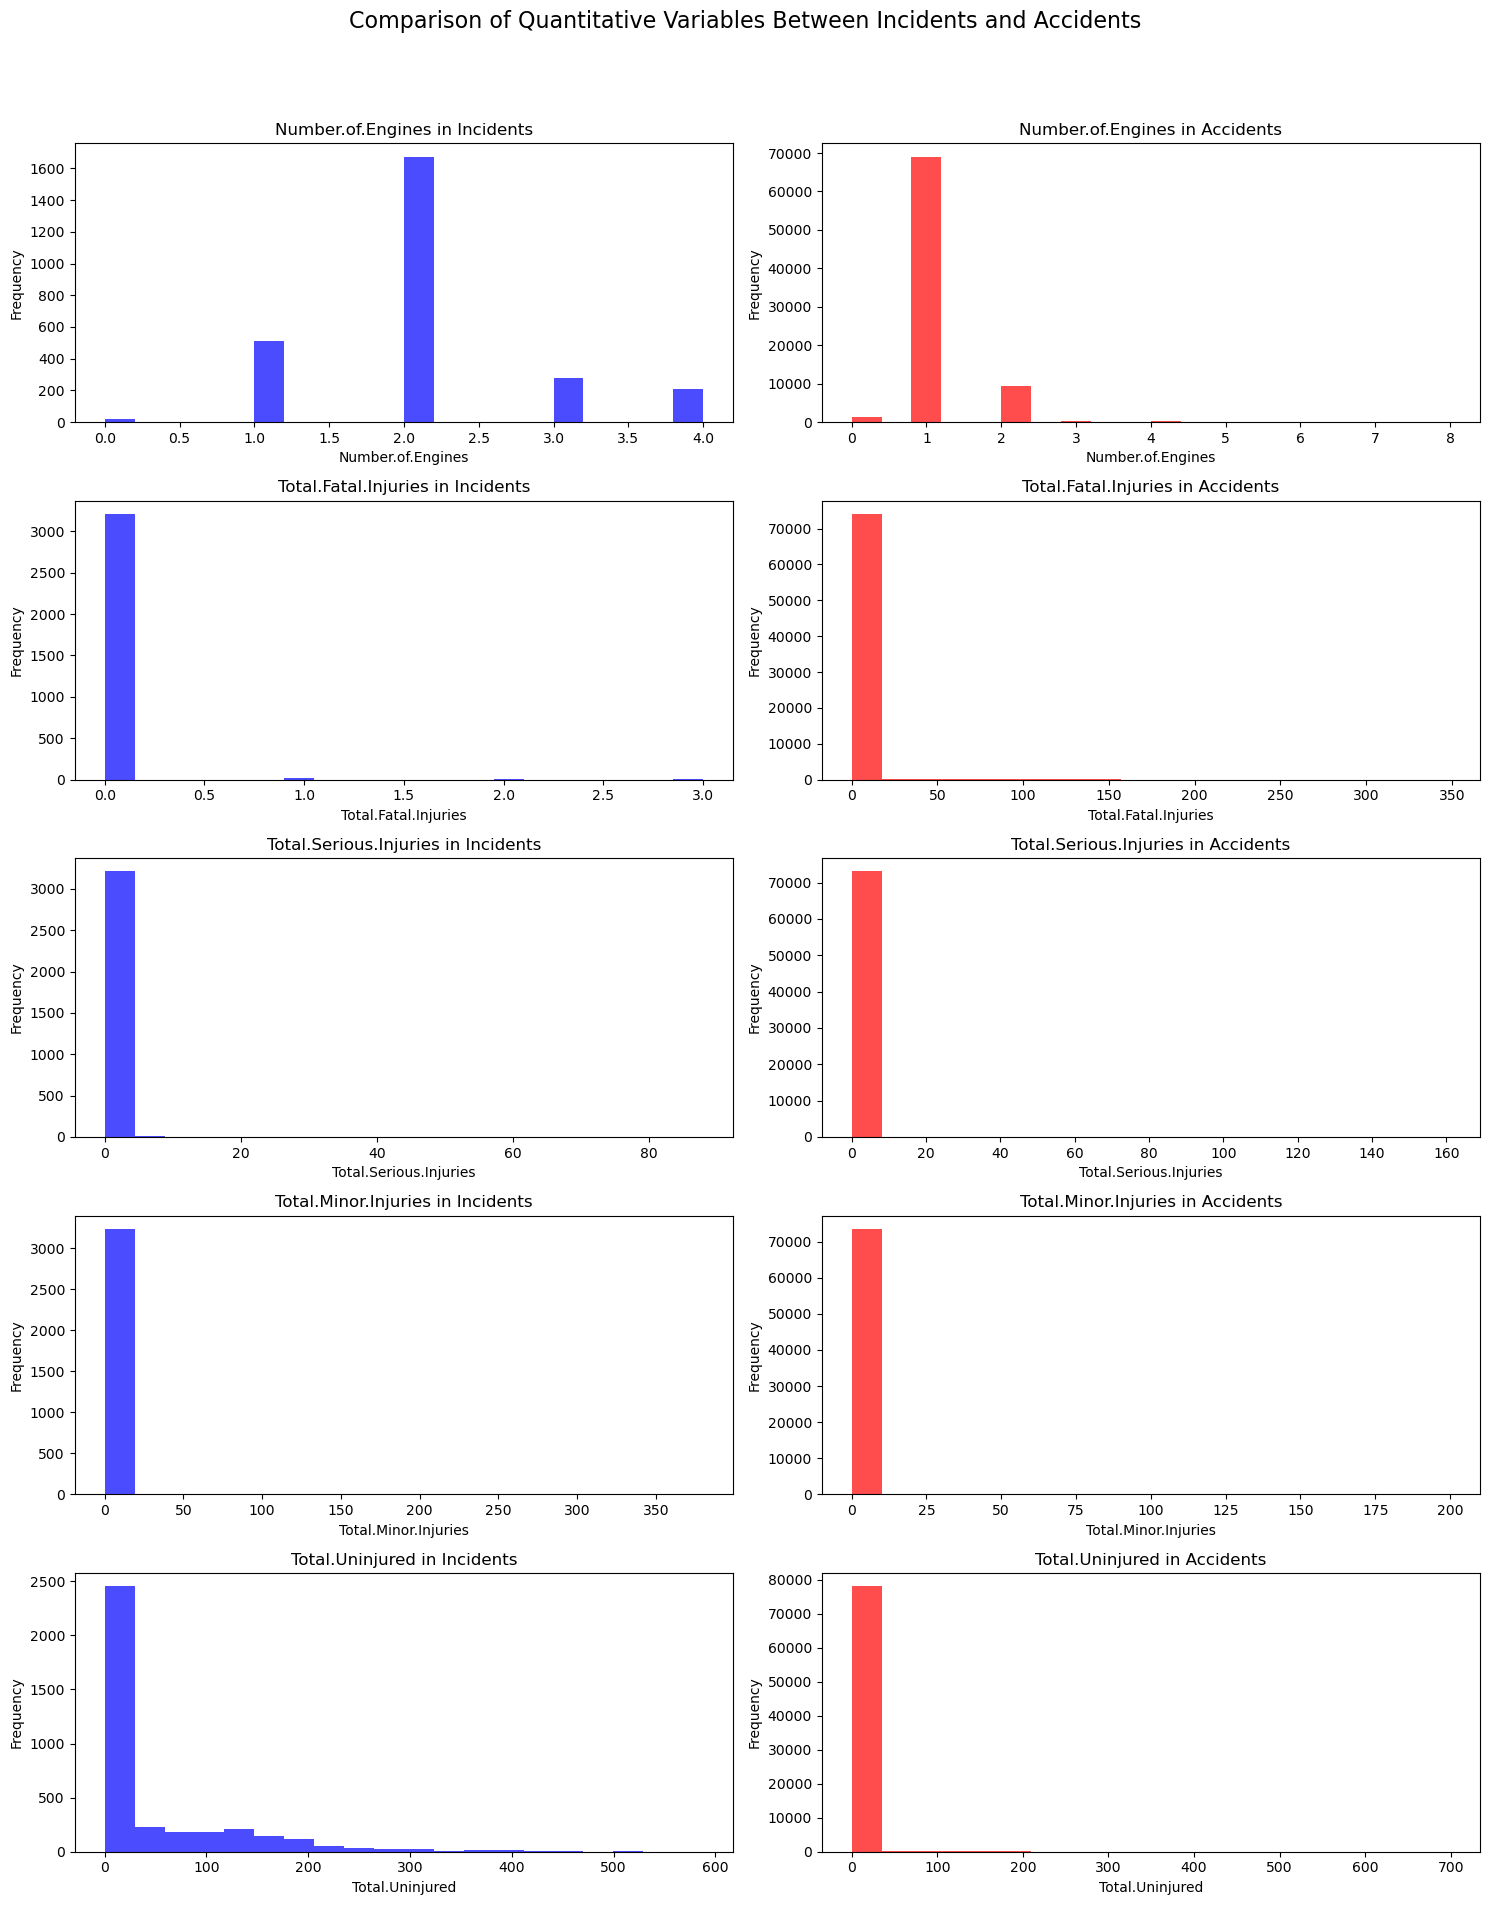

In [77]:
columns_to_plot = ['Number.of.Engines', 'Total.Fatal.Injuries', 
                   'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(15, 20), sharey=False)

for i, col in enumerate(columns_to_plot):

    incidents_df[col].plot(kind='hist', bins=20, ax=axes[i, 0], color='blue', alpha=0.7, title=f'{col} in Incidents')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    accidents_df[col].plot(kind='hist', bins=20, ax=axes[i, 1], color='red', alpha=0.7, title=f'{col} in Accidents')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

fig.suptitle('Comparison of Quantitative Variables Between Incidents and Accidents', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [78]:
df = df[df['Investigation.Type'] != 'Incident']
print(df['Investigation.Type'].value_counts())

Investigation.Type
Accident    85015
Name: count, dtype: int64


In [79]:
location_vc = df['Location'].value_counts()
print(location_vc)

Location
ANCHORAGE, AK            405
ALBUQUERQUE, NM          192
HOUSTON, TX              174
FAIRBANKS, AK            169
MIAMI, FL                158
                        ... 
SHIELDS, KS                1
TRINIDAD, West Indies      1
GULF OF CA                 1
ZAVALLA, TX                1
Brasnorte,                 1
Name: count, Length: 26903, dtype: int64


In [80]:
location_unq = df['Location'].unique()
location_unq

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '], dtype=object)

In [81]:
loc_unq_count = df['Location'].nunique()
print(loc_unq_count)

26903


In [82]:
df.drop(['Unnamed: 0', 'Location'], axis=1)

,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,United States,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,Accident,2022-12-26,United States,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,Accident,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,Accident,2022-12-26,United States,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [83]:
country_vc = df['Country'].value_counts()
country_vc

Country
United States     79906
Brazil              331
Canada              312
Mexico              291
United Kingdom      221
                  ...  
Guam                  1
Ivory Coast           1
Malampa               1
AY                    1
Cambodia              1
Name: count, Length: 209, dtype: int64

In [84]:
country_unq_count = df['Country'].nunique()
print(country_unq_count)

209


In [85]:
aircraft_dam_vc = df['Aircraft.damage'].value_counts()
aircraft_dam_vc

Aircraft.damage
Substantial    64106
Destroyed      18615
Minor            737
Unknown           97
Name: count, dtype: int64

In [86]:
aircraft_dam_uk = df[df['Aircraft.damage'] == 'Unknown']

In [87]:
print(aircraft_dam_uk['Total.Minor.Injuries'].value_counts())

Total.Minor.Injuries
0.0    83
1.0     9
2.0     3
3.0     1
7.0     1
Name: count, dtype: int64


In [88]:
df = df[df['Aircraft.damage'] != 'Unknown']
print(df['Aircraft.damage'].value_counts())

Aircraft.damage
Substantial    64106
Destroyed      18615
Minor            737
Name: count, dtype: int64


In [89]:
aircraft_dam_nan = df['Aircraft.damage'].isna().value_counts()
print(aircraft_dam_nan)

Aircraft.damage
False    83458
True      1460
Name: count, dtype: int64


In [90]:
col_list = ['Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
selection = df.loc[df.notna().all(axis=1), col_list]

selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3475 entries, 7 to 63908
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.damage         3475 non-null   object 
 1   Total.Fatal.Injuries    3475 non-null   float64
 2   Total.Serious.Injuries  3475 non-null   float64
 3   Total.Minor.Injuries    3475 non-null   float64
 4   Total.Uninjured         3475 non-null   float64
dtypes: float64(4), object(1)
memory usage: 162.9+ KB


In [91]:
df['Aircraft.damage'] = df['Aircraft.damage'].apply(lambda x: np.random.choice(['Substantial', 'Destroyed'], p=[0.8,0.2]) if pd.isna(x) else x)

In [92]:
aircraft_dam_nan = df['Aircraft.damage'].isna().value_counts()
print(aircraft_dam_nan)

Aircraft.damage
False    84918
Name: count, dtype: int64


In [93]:
print(df['Aircraft.damage'].value_counts())

Aircraft.damage
Substantial    65268
Destroyed      18913
Minor            737
Name: count, dtype: int64


In [94]:
make_vc = df['Make'].value_counts()
make_vc.head(50)

Make
Cessna                            21973
Piper                             11885
CESSNA                             4785
Beech                              4170
PIPER                              2785
Bell                               2093
Grumman                            1080
Mooney                             1074
BEECH                              1005
Robinson                            943
Boeing                              916
Bellanca                            883
Hughes                              790
Schweizer                           627
Air Tractor                         593
BELL                                564
Aeronca                             484
Maule                               443
BOEING                              443
Champion                            427
Aero Commander                      353
Stinson                             345
De Havilland                        342
Rockwell                            325
Taylorcraft                        

In [95]:
make_nan = df['Make'].isna().value_counts()
print(make_nan)

Make
False    84882
True        36
Name: count, dtype: int64


In [96]:
make_unq = df['Make'].nunique()
make_unq

8161

In [97]:
df.dropna(subset='Make', inplace=True)

In [98]:
make_nan = df['Make'].isna().value_counts()
print(make_nan)

Make
False    84882
Name: count, dtype: int64


In [99]:
model_vc = df['Model'].value_counts()
model_vc.head(50)

Model
152           2347
172           1744
172N          1161
PA-28-140      928
150            821
172M           791
172P           685
182            651
180            620
150M           583
PA-18          581
PA-18-150      578
PA-28-180      570
PA-28-161      565
PA-28-181      528
206B           521
PA-38-112      465
G-164A         460
150L           459
A36            446
G-164B         420
140            402
170B           389
206            374
172S           361
R44            355
PA-32-300      352
182P           350
PA-24-250      349
269C           340
PA-28R-200     328
PA-12          322
A188B          316
PA-23-250      306
177            296
7AC            294
A185F          283
M20J           280
185            280
PA-22-150      280
7GCBC          277
PA28           272
R22            272
SR22           271
7ECA           267
182Q           266
150F           263
PA-25-235      260
PA-31-350      259
210            258
Name: count, dtype: int64

In [100]:
model_nan = df['Model'].isna().value_counts()
model_nan

Model
False    84840
True        42
Name: count, dtype: int64

In [101]:
df.dropna(subset='Model', inplace=True)

In [102]:
model_nan = df['Model'].isna().value_counts()
model_nan

Model
False    84840
Name: count, dtype: int64

In [103]:
model_unq = df['Model'].nunique()
model_unq

11759

In [104]:
amateur_blt_vc = df['Amateur.Built'].value_counts()
amateur_blt_vc

Amateur.Built
No     76387
Yes     8397
Name: count, dtype: int64

In [105]:
amateur_built_nan = df['Amateur.Built'].isna().value_counts()
amateur_built_nan

Amateur.Built
False    84784
True        56
Name: count, dtype: int64

In [106]:
amateur_blt_df = df[df['Amateur.Built'] == 'Yes']

In [107]:
print(amateur_blt_df['Number.of.Engines'].value_counts())

Number.of.Engines
1.0    7976
2.0      73
0.0      64
4.0       1
3.0       1
Name: count, dtype: int64


In [108]:
print(amateur_blt_df['Total.Fatal.Injuries'].value_counts())

Total.Fatal.Injuries
0.0     4896
1.0     1705
2.0      570
3.0       38
4.0       14
7.0        4
5.0        4
6.0        2
8.0        1
35.0       1
18.0       1
Name: count, dtype: int64


In [109]:
print(amateur_blt_df['Total.Serious.Injuries'].value_counts())

Total.Serious.Injuries
0.0    5452
1.0    1366
2.0     240
3.0      16
4.0       3
5.0       2
Name: count, dtype: int64


In [110]:
print(amateur_blt_df['Total.Minor.Injuries'].value_counts())

Total.Minor.Injuries
0.0     5491
1.0     1367
2.0      255
3.0       12
4.0        4
5.0        3
68.0       1
Name: count, dtype: int64


In [111]:
print(amateur_blt_df['Total.Uninjured'].value_counts())

Total.Uninjured
0.0      4051
1.0      2377
2.0       918
3.0        67
4.0        19
5.0         6
6.0         1
175.0       1
71.0        1
360.0       1
213.0       1
7.0         1
153.0       1
46.0        1
10.0        1
8.0         1
137.0       1
9.0         1
160.0       1
Name: count, dtype: int64


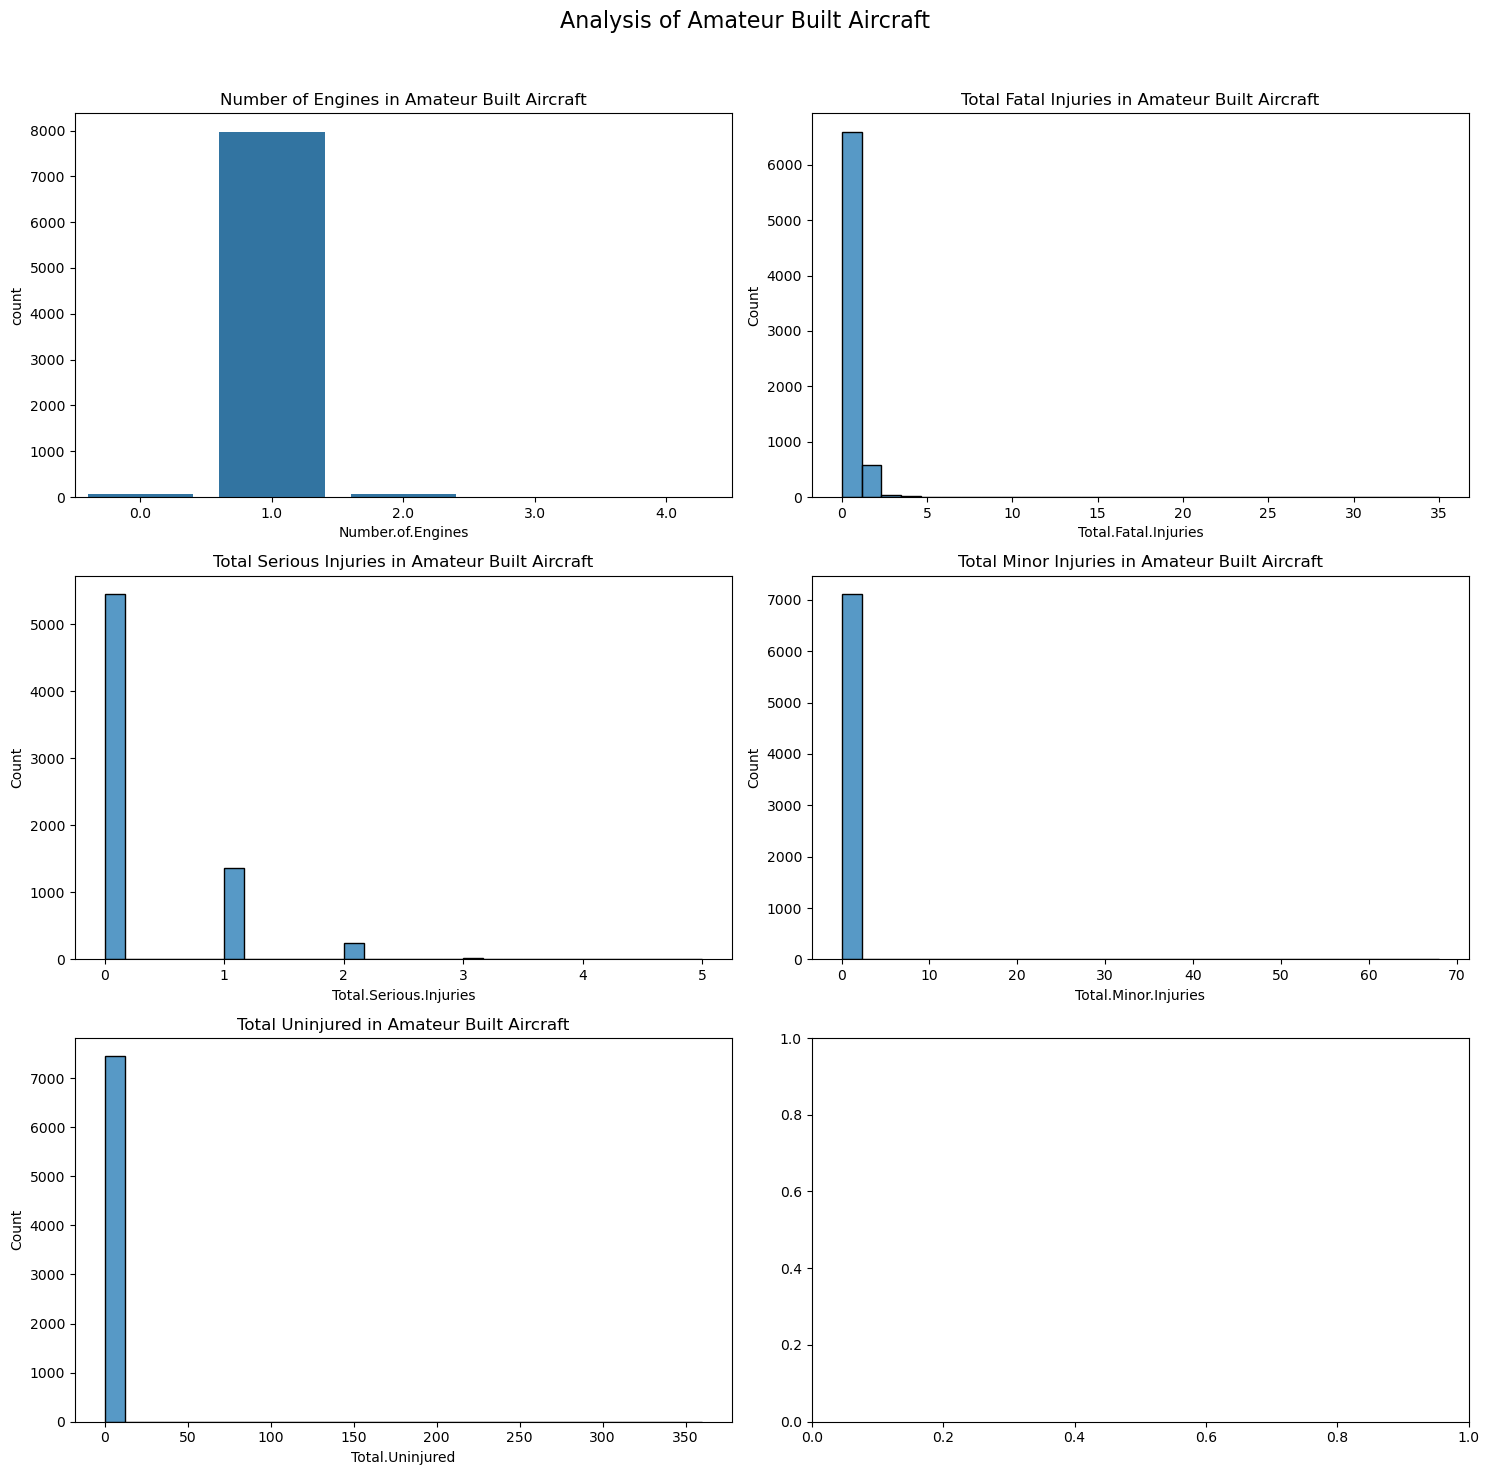

In [112]:
# Setting up the plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Create a grid of plots
fig.suptitle('Analysis of Amateur Built Aircraft', fontsize=16)

# Plot Number of Engines
sns.countplot(ax=axes[0, 0], data=amateur_blt_df, x='Number.of.Engines')
axes[0, 0].set_title('Number of Engines in Amateur Built Aircraft')

# Plot Total Fatal Injuries
sns.histplot(ax=axes[0, 1], data=amateur_blt_df, x='Total.Fatal.Injuries', bins=30)
axes[0, 1].set_title('Total Fatal Injuries in Amateur Built Aircraft')

# Plot Total Serious Injuries
sns.histplot(ax=axes[1, 0], data=amateur_blt_df, x='Total.Serious.Injuries', bins=30)
axes[1, 0].set_title('Total Serious Injuries in Amateur Built Aircraft')

# Plot Total Minor Injuries
sns.histplot(ax=axes[1, 1], data=amateur_blt_df, x='Total.Minor.Injuries', bins=30)
axes[1, 1].set_title('Total Minor Injuries in Amateur Built Aircraft')

# Plot Total Uninjured
sns.histplot(ax=axes[2, 0], data=amateur_blt_df, x='Total.Uninjured', bins=30)
axes[2, 0].set_title('Total Uninjured in Amateur Built Aircraft')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

     Total.Injured  Total.Uninjured  Injury.Percentage
45             0.0              3.0                0.0
73             0.0              1.0                0.0
99             1.0              0.0              100.0
124            1.0              0.0              100.0
143            1.0              0.0              100.0


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_83679/1189663532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amateur_blt_df['Total.Injured'] = (
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_83679/1189663532.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amateur_blt_df['Injury.Percentage'] = (


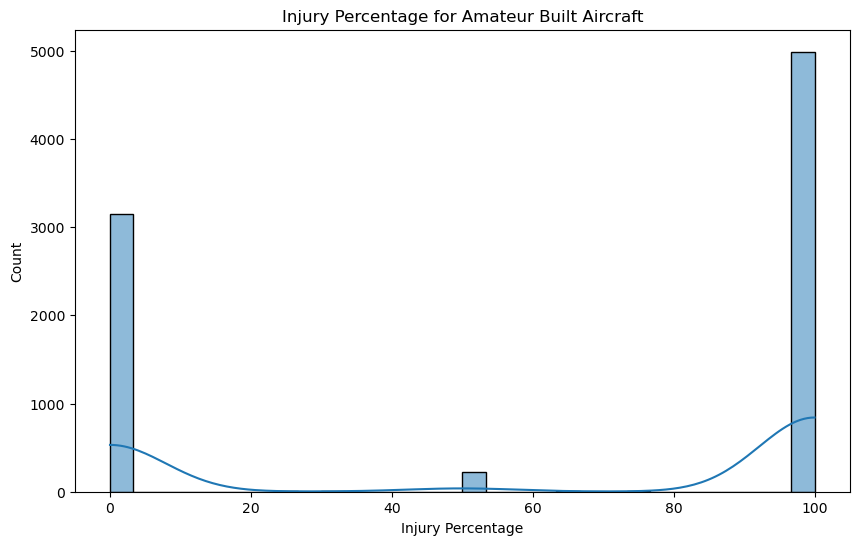

In [113]:
# Sum of all injuries columns to get total injured
amateur_blt_df['Total.Injured'] = (
    amateur_blt_df['Total.Fatal.Injuries'].fillna(0) +
    amateur_blt_df['Total.Serious.Injuries'].fillna(0) +
    amateur_blt_df['Total.Minor.Injuries'].fillna(0)
)

# Calculate the percentage of total injured
amateur_blt_df['Injury.Percentage'] = (
    amateur_blt_df['Total.Injured'] / 
    (amateur_blt_df['Total.Injured'] + amateur_blt_df['Total.Uninjured'].fillna(0))
) * 100

# Display the dataframe with new columns for review
print(amateur_blt_df[['Total.Injured', 'Total.Uninjured', 'Injury.Percentage']].head())

plt.figure(figsize=(10, 6))
sns.histplot(data=amateur_blt_df, x='Injury.Percentage', bins=30, kde=True)
plt.title('Injury Percentage for Amateur Built Aircraft')
plt.xlabel('Injury Percentage')
plt.ylabel('Count')
plt.show()


In [114]:
purp_of_flight_vc = df['Purpose.of.flight'].value_counts()
purp_of_flight_vc

Purpose.of.flight
Personal                     49114
Instructional                10463
Unknown                       5529
Aerial Application            4701
Business                      3899
Positioning                   1560
Other Work Use                1236
Aerial Observation             790
Ferry                          787
Public Aircraft                695
Executive/corporate            501
Flight Test                    392
Skydiving                      181
External Load                  122
Public Aircraft - Federal      103
Banner Tow                     101
Air Race show                   98
Public Aircraft - Local         72
Public Aircraft - State         62
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [115]:
purp_of_flight_unq = df['Purpose.of.flight'].nunique()
purp_of_flight_unq

26

In [116]:
purp_of_flight_nan = df['Purpose.of.flight'].isna().value_counts()
purp_of_flight_nan

Purpose.of.flight
False    80580
True      4260
Name: count, dtype: int64

In [117]:
purp_of_flight_df = df[df['Purpose.of.flight'].isna()]

columns_to_analyze = [
    'Number.of.Engines',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

counts = {}
for col in columns_to_analyze:
    counts[col] = purp_of_flight_df[col].value_counts()
    
for col, count in counts.items():
    print(f"Counts for {col}:")
    print(count)
    print("\n")

Counts for Number.of.Engines:
Number.of.Engines
2.0    1242
1.0    1040
4.0      61
3.0      47
0.0       1
Name: count, dtype: int64


Counts for Total.Fatal.Injuries:
Total.Fatal.Injuries
0.0      1901
1.0       536
2.0       359
3.0       152
4.0       141
         ... 
124.0       1
96.0        1
114.0       1
199.0       1
132.0       1
Name: count, Length: 90, dtype: int64


Counts for Total.Serious.Injuries:
Total.Serious.Injuries
0.0      2636
1.0       352
2.0       130
3.0        90
4.0        48
5.0        25
6.0        11
10.0        7
9.0         7
7.0         7
8.0         6
11.0        5
12.0        4
25.0        3
20.0        3
28.0        2
59.0        2
14.0        2
67.0        1
125.0       1
21.0        1
26.0        1
161.0       1
19.0        1
137.0       1
35.0        1
47.0        1
55.0        1
53.0        1
34.0        1
41.0        1
13.0        1
63.0        1
50.0        1
23.0        1
17.0        1
43.0        1
39.0        1
22.0        1
Name: count,

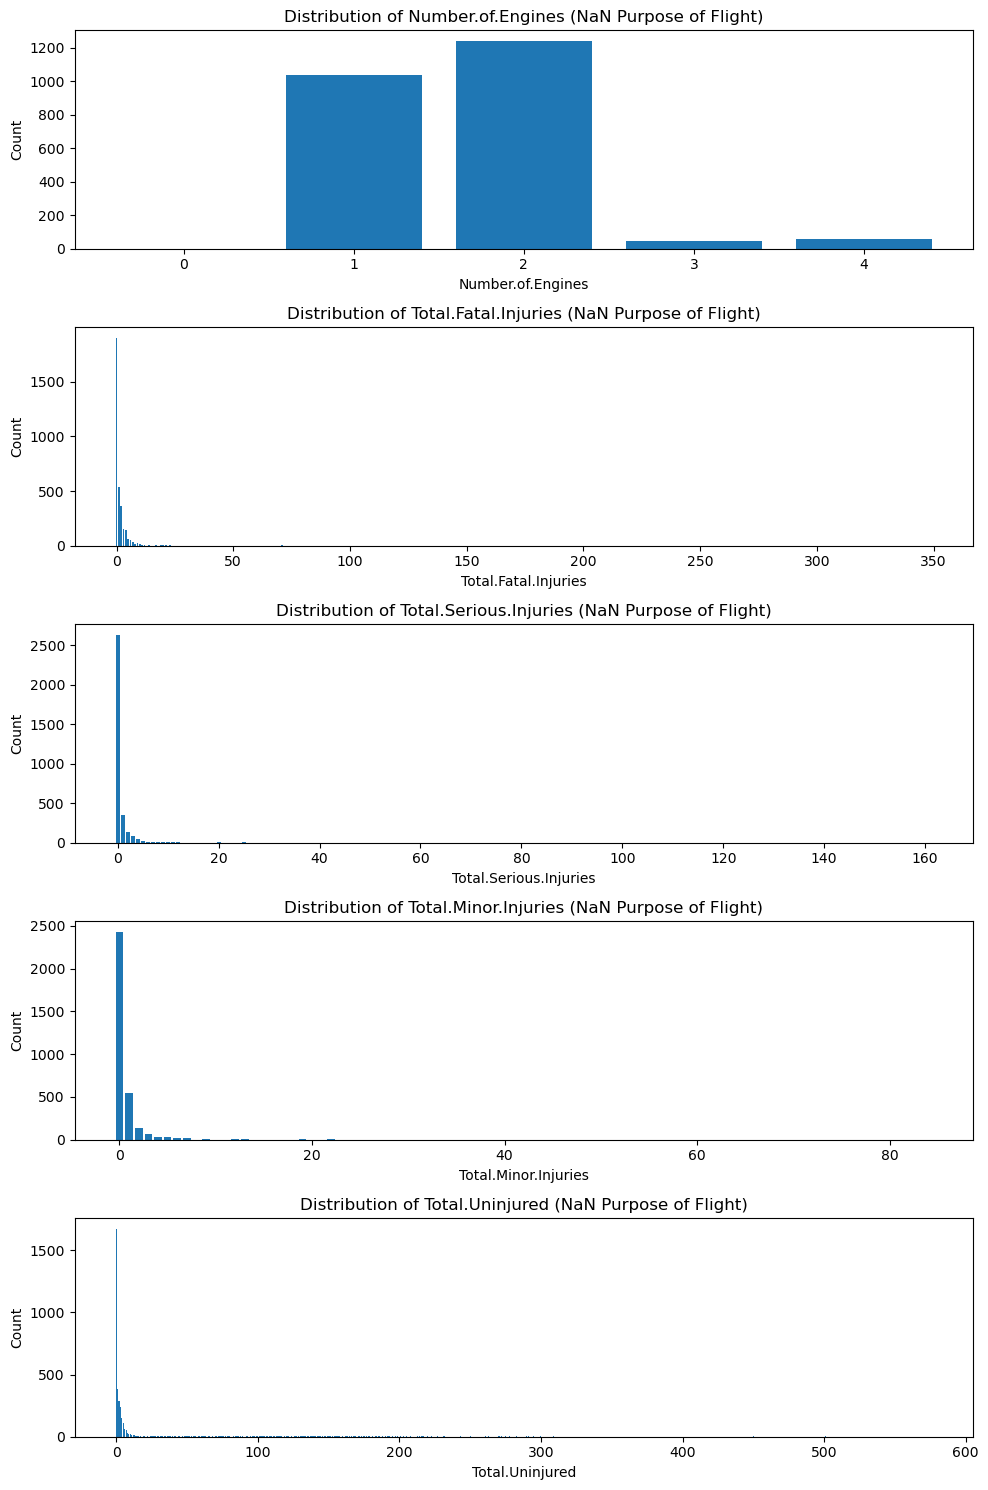

In [118]:
purp_of_flight_df = df[df['Purpose.of.flight'].isna()]

columns_to_analyze = [
    'Number.of.Engines',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(10, 15))

for ax, col in zip(axes, columns_to_analyze):
    value_counts = purp_of_flight_df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f'Distribution of {col} (NaN Purpose of Flight)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [119]:
weat_counts = df['Weather.Condition'].value_counts()
weat_counts

Weather.Condition
VMC    75105
IMC     5720
UNK      754
Unk      211
Name: count, dtype: int64

In [120]:
phase_of_flight_vc = df['Broad.phase.of.flight'].value_counts()
phase_of_flight_vc

Broad.phase.of.flight
Landing        15069
Takeoff        12121
Cruise          9899
Maneuvering     8101
Approach        6330
Climb           1848
Taxi            1783
Descent         1777
Go-around       1338
Standing         854
Unknown          536
Other            111
Name: count, dtype: int64

In [121]:
phase_of_flight_unq = df['Broad.phase.of.flight'].nunique()
phase_of_flight_unq

12

In [122]:
phase_of_flight_nan = df['Broad.phase.of.flight'].isna().value_counts()
phase_of_flight_nan

Broad.phase.of.flight
False    59767
True     25073
Name: count, dtype: int64

In [125]:
df.to_csv('cleaned_aviation_data.csv', index=False)

In [126]:
import os
os.getcwd()

'/Users/davidjimenez/NTSB_Aviation_Accident_Database'